In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np
import warnings 
import ast
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Reading data

In [7]:
df1 = pd.read_csv(r"C:\Users\MutukunduNandaKumarR\Desktop\Final_Project\Data_Science\feedback.csv")

### Shape of the data

In [8]:
df1.shape

(6000, 7)

### Checking Null Values

In [9]:
df1.isnull().sum()

_id           0
questionid    0
startDate     0
endDate       0
userName      0
ratings       0
feedback      0
dtype: int64

In [10]:
df1.head()

,_id,questionid,startDate,endDate,userName,ratings,feedback
0,66139968fc13ae1beeab8e4f,6614d0dbfc13ae602fab8ff5,2024-04-11,2024-04-17,Sherye Gellan,"['Below Average', 'Below Average', 'Very Good'...",Could be better.
1,66139968fc13ae1beeab8e50,6614d0dbfc13ae602fab8ff7,2024-04-10,2024-04-16,Pincus Govan,"['Very Good', 'Terrible', 'Fair', 'Poor', 'Bel...",Could be better.
2,66139968fc13ae1beeab8e51,6614d0dbfc13ae602fab8ff9,2024-04-10,2024-04-16,Mitchel McIndoe,"['Fair', 'Outstanding', 'Outstanding', 'Outsta...",Could be better.
3,66139968fc13ae1beeab8e52,6614d0dbfc13ae602fab8ffb,2024-04-09,2024-04-15,Cornie Kendal,"['Terrible', 'Terrible', 'Fair', 'Outstanding'...",Great job!
4,66139968fc13ae1beeab8e53,6614d0dbfc13ae602fab8ffd,2024-04-13,2024-04-19,Rancell Phillipps,"['Good', 'Average', 'Fair', 'Fair', 'Outstandi...",Could be better.


### Univariate Analysis

In [11]:
df1['ratings'] = df1['ratings'].apply(ast.literal_eval)

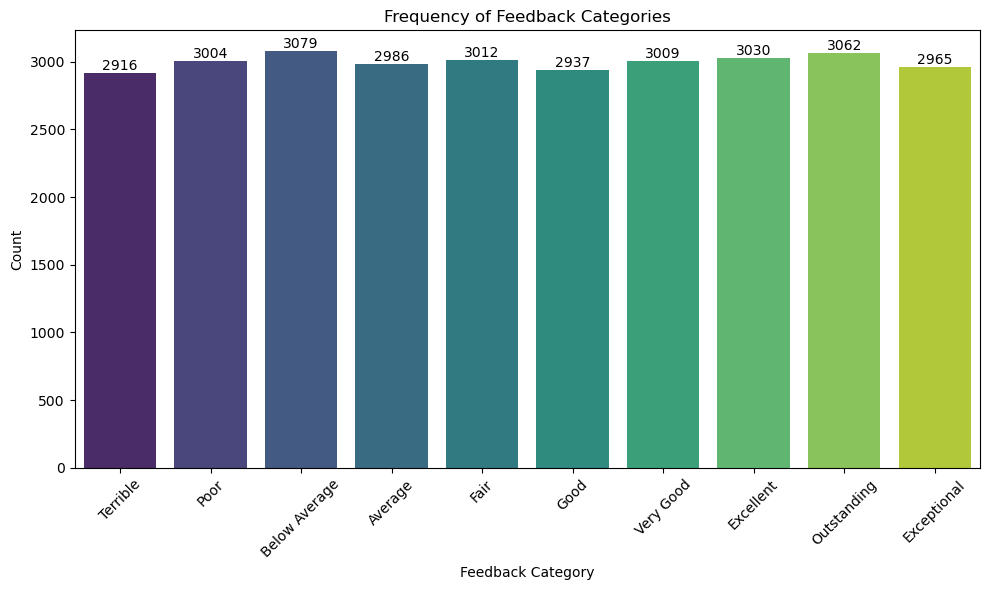

In [12]:
df_exploded = df1.explode('ratings')

# Define the feedback categories
feedback_categories = ["Terrible", "Poor", "Below Average", "Average", "Fair",
                       "Good", "Very Good", "Excellent", "Outstanding", "Exceptional"]

# Count the occurrences of each feedback category
feedback_counts = df_exploded['ratings'].value_counts().reindex(feedback_categories, fill_value=0)

# Plot the frequency of each feedback category
plt.figure(figsize=(10, 6))
sns.barplot(x=feedback_counts.index, y=feedback_counts.values, palette='viridis')
plt.title('Frequency of Feedback Categories')
plt.xlabel('Feedback Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotate count values on top of each bar
for i, count in enumerate(feedback_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

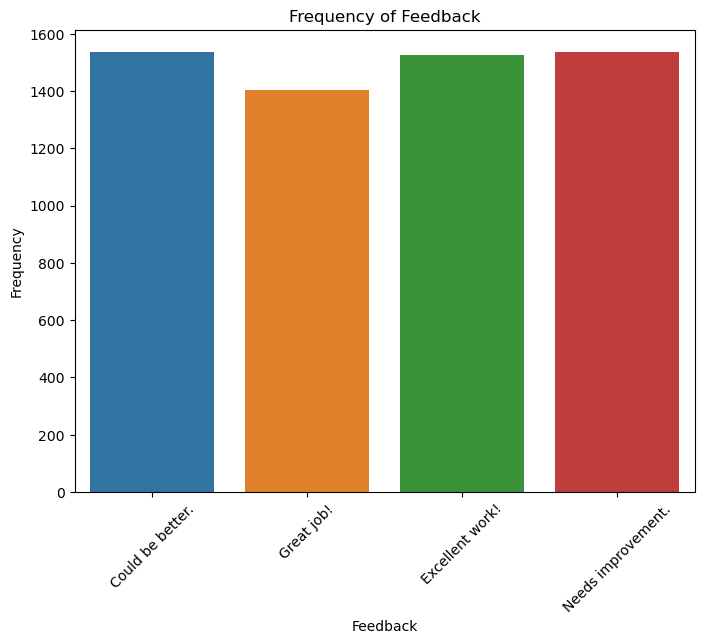

In [13]:
# Create a count plot for feedback
plt.figure(figsize=(8, 6))
sns.countplot(x='feedback', data=df1)
plt.title('Frequency of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Bivariant Analysis

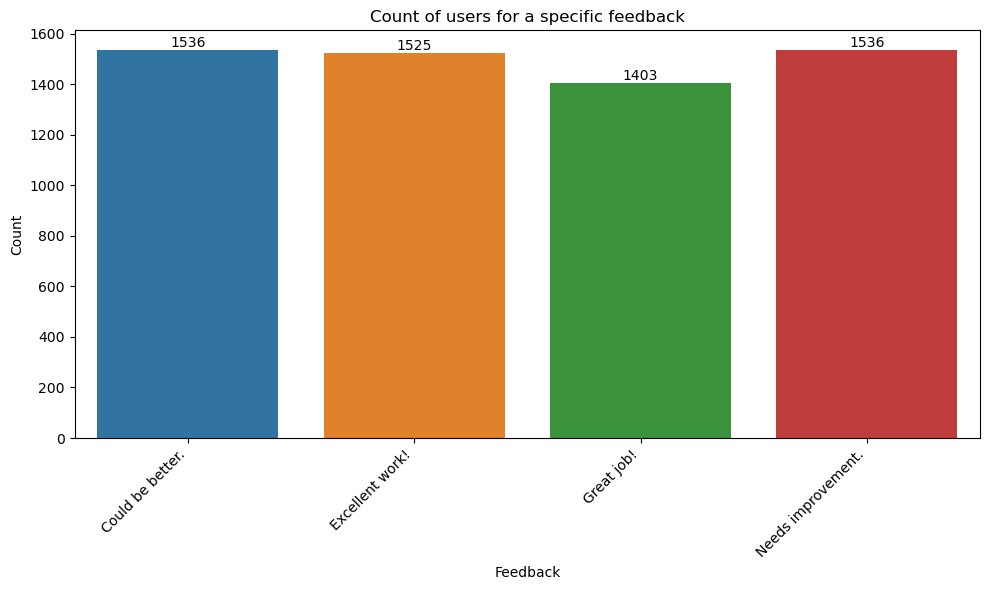

In [14]:
feedback_counts = df1.groupby('feedback')['userName'].count().reset_index()
feedback_counts.columns = ['feedback', 'count']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.barplot(x='feedback', y='count', data=feedback_counts)

# Set labels and title
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Count of users for a specific feedback')

# Display the count values on top of each bar
for index, row in feedback_counts.iterrows():
    plt.text(index, row['count'], str(row['count']), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
df2 = pd.read_csv(r"C:\Users\MutukunduNandaKumarR\Desktop\Final_Project\Data_Science\Questions_and_rating.csv")

In [16]:
df2.isnull().sum()

userName     0
questions    0
ratings      0
feedback     0
dtype: int64

In [17]:
df2.head()

,userName,questions,ratings,feedback
0,Sherye Gellan,"[""On a scale of 0 to 5, how well did your skil...","['Below Average', 'Below Average', 'Very Good'...",Could be better.
1,Pincus Govan,"[""On a scale of 0 to 5, how well did your skil...","['Very Good', 'Terrible', 'Fair', 'Poor', 'Bel...",Could be better.
2,Mitchel McIndoe,"[""On a scale of 0 to 5, how well did your skil...","['Fair', 'Outstanding', 'Outstanding', 'Outsta...",Could be better.
3,Cornie Kendal,"[""On a scale of 0 to 5, how well did your skil...","['Terrible', 'Terrible', 'Fair', 'Outstanding'...",Great job!
4,Rancell Phillipps,"[""On a scale of 0 to 5, how well did your skil...","['Good', 'Average', 'Fair', 'Fair', 'Outstandi...",Could be better.


### Multivariate Analysis

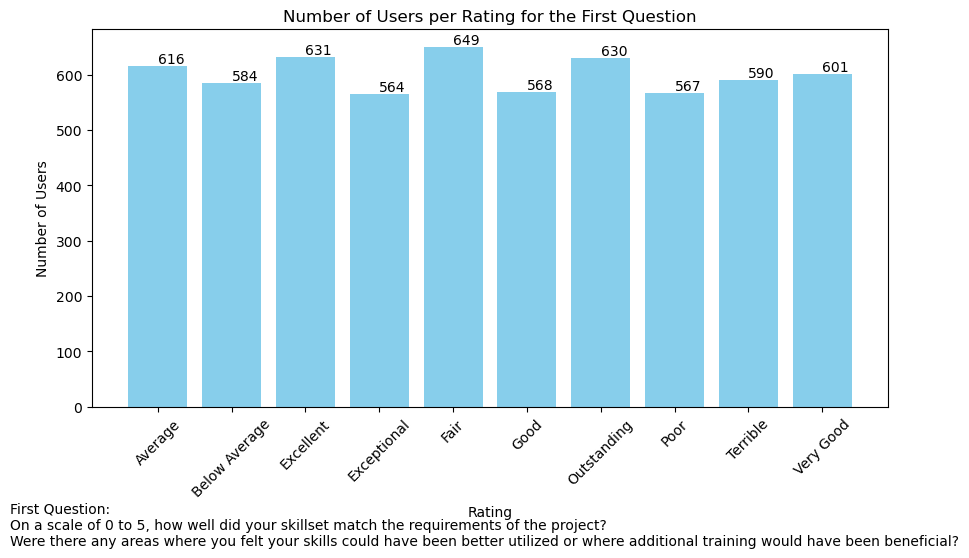

In [18]:
df2['first_question'] = df2['questions'].apply(lambda x: eval(x)[0])
df2['first_rating'] = df2['ratings'].apply(lambda x: eval(x)[0])

# Group by the first question and first rating, then count the number of users in each group
users_per_rating = df2.groupby(['first_question', 'first_rating']).size()

plt.figure(figsize=(10, 6))
bars = plt.bar(users_per_rating.index.get_level_values('first_rating'), users_per_rating.values, color='skyblue')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

# Add title
plt.title('Number of Users per Rating for the First Question')

# Display the question below the title
plt.text(-2, -250, 'First Question:\nOn a scale of 0 to 5, how well did your skillset match the requirements of the project?\nWere there any areas where you felt your skills could have been better utilized or where additional training would have been beneficial?', fontsize=10)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

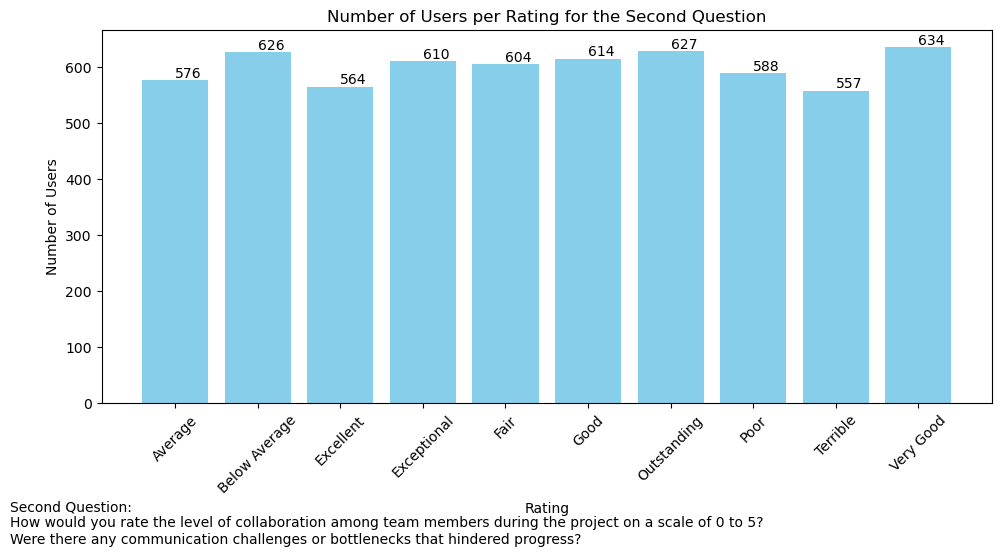

In [19]:
df2['second_question'] = df2['questions'].apply(lambda x: eval(x)[1])
df2['second_rating'] = df2['ratings'].apply(lambda x: eval(x)[1])

# Group by the first question and first rating, then count the number of users in each group
users_per_rating = df2.groupby(['second_question', 'second_rating']).size()

plt.figure(figsize=(10, 6))
bars = plt.bar(users_per_rating.index.get_level_values('second_rating'), users_per_rating.values, color='skyblue')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

# Add title
plt.title('Number of Users per Rating for the Second Question')

# Display the question below the title
plt.text(-2, -250, 'Second Question:\nHow would you rate the level of collaboration among team members during the project on a scale of 0 to 5?\nWere there any communication challenges or bottlenecks that hindered progress?', fontsize=10)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

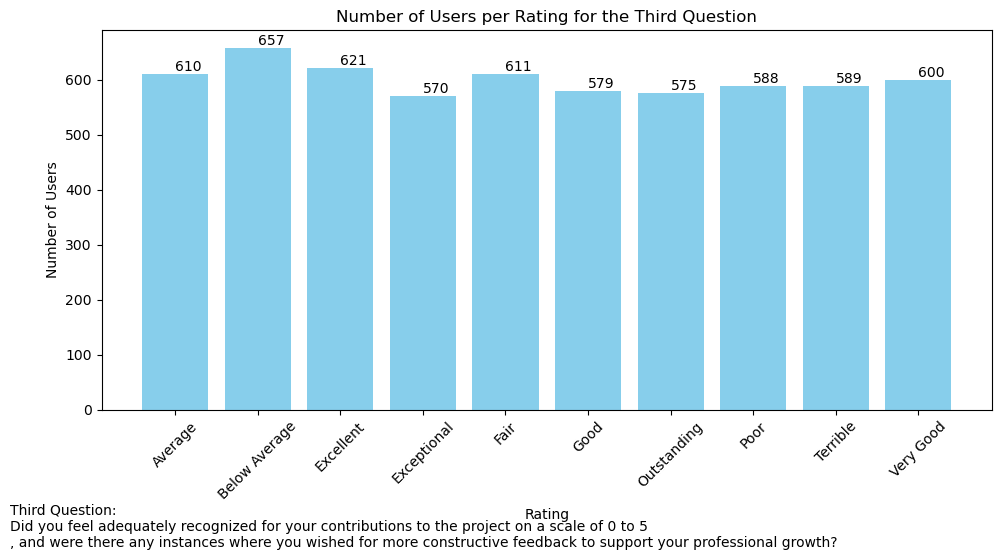

In [20]:
df2['third_question'] = df2['questions'].apply(lambda x: eval(x)[2])
df2['third_rating'] = df2['ratings'].apply(lambda x: eval(x)[2])

# Group by the first question and first rating, then count the number of users in each group
users_per_rating = df2.groupby(['third_question', 'third_rating']).size()

plt.figure(figsize=(10, 6))
bars = plt.bar(users_per_rating.index.get_level_values('third_rating'), users_per_rating.values, color='skyblue')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

# Add title
plt.title('Number of Users per Rating for the Third Question')

# Display the question below the title
plt.text(-2, -250, 'Third Question:\nDid you feel adequately recognized for your contributions to the project on a scale of 0 to 5\n, and were there any instances where you wished for more constructive feedback to support your professional growth?', fontsize=10)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

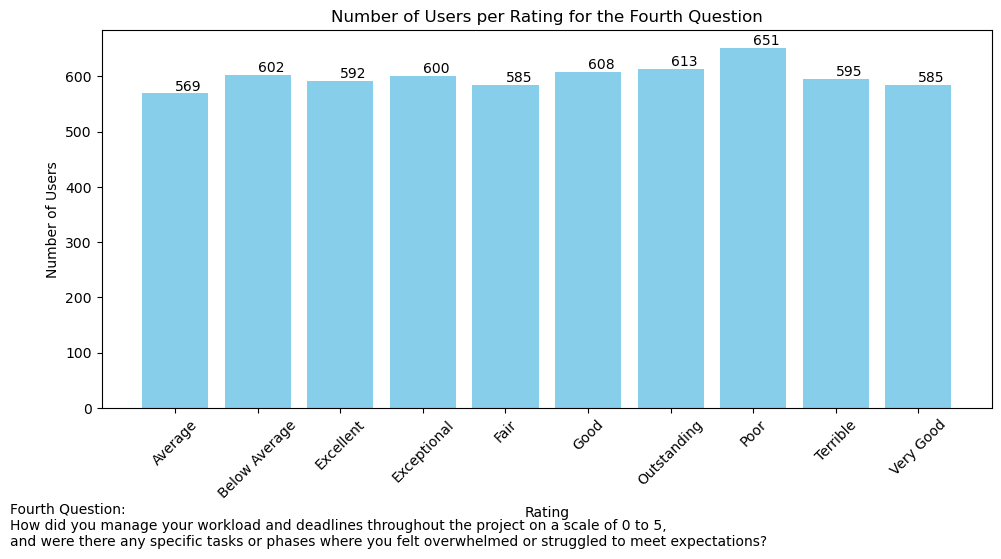

In [21]:
df2['fourth_question'] = df2['questions'].apply(lambda x: eval(x)[3])
df2['fourth_rating'] = df2['ratings'].apply(lambda x: eval(x)[3])

# Group by the first question and first rating, then count the number of users in each group
users_per_rating = df2.groupby(['fourth_question', 'fourth_rating']).size()

plt.figure(figsize=(10, 6))
bars = plt.bar(users_per_rating.index.get_level_values('fourth_rating'), users_per_rating.values, color='skyblue')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

# Add title
plt.title('Number of Users per Rating for the Fourth Question')

# Display the question below the title
plt.text(-2, -250, 'Fourth Question:\nHow did you manage your workload and deadlines throughout the project on a scale of 0 to 5, \nand were there any specific tasks or phases where you felt overwhelmed or struggled to meet expectations?', fontsize=10)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

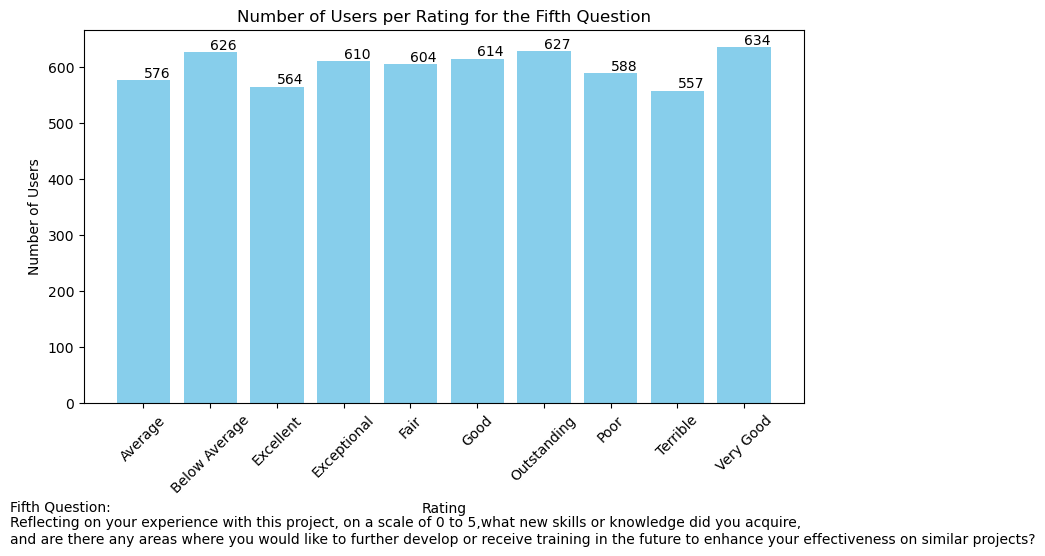

In [22]:
df2['fifth_question'] = df2['questions'].apply(lambda x: eval(x)[1])
df2['fifth_rating'] = df2['ratings'].apply(lambda x: eval(x)[1])

# Group by the first question and first rating, then count the number of users in each group
users_per_rating = df2.groupby(['fifth_question', 'fifth_rating']).size()

plt.figure(figsize=(10, 6))
bars = plt.bar(users_per_rating.index.get_level_values('fifth_rating'), users_per_rating.values, color='skyblue')

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')

# Add title
plt.title('Number of Users per Rating for the Fifth Question')

# Display the question below the title
plt.text(-2, -250, 'Fifth Question:\nReflecting on your experience with this project, on a scale of 0 to 5,what new skills or knowledge did you acquire, \nand are there any areas where you would like to further develop or receive training in the future to enhance your effectiveness on similar projects?', fontsize=10)

# Add labels
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Model Development

In [23]:
rating_map = {
    'Terrible': 0.5,
    'Poor': 1,
    'Below Average': 1.5,
    'Average': 2,
    'Fair': 2.5,
    'Good': 3,
    'Very Good': 3.5,
    'Excellent': 4,
    'Outstanding': 4.5,
    'Exceptional': 5
}

df2['ratings'] = df2['ratings'].apply(lambda x: [rating_map[r] for r in x] if isinstance(x, list) else [])

# Calculate the average rating
df2['ratings'] = df2['ratings'].apply(lambda x: np.mean(x) if x else 0)

X = df2[['questions', 'ratings']]  # Combine questions and ratings as features
y = df2['feedback']  # Feedback is the target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define TF-IDF vectorizer for text data
tfidf_vectorizer = TfidfVectorizer()

# Define column transformer to apply TF-IDF to text data and leave ratings as is
preprocessor = ColumnTransformer(
    transformers=[
        ('text', tfidf_vectorizer, 'questions'),
        ('numeric', 'passthrough', ['ratings'])
    ],
    remainder='drop'
)

# Define logistic regression model
lr_model = LogisticRegression()

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr_model)
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_lr = pipeline.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.25

Classification Report (Logistic Regression):
                    precision    recall  f1-score   support

  Could be better.       0.00      0.00      0.00       313
   Excellent work!       0.25      1.00      0.40       296
        Great job!       0.00      0.00      0.00       280
Needs improvement.       0.00      0.00      0.00       311

          accuracy                           0.25      1200
         macro avg       0.06      0.25      0.10      1200
      weighted avg       0.06      0.25      0.10      1200



In [24]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Train pipeline
pipeline_rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.25

Classification Report (Random Forest):
                    precision    recall  f1-score   support

  Could be better.       0.00      0.00      0.00       313
   Excellent work!       0.25      1.00      0.40       296
        Great job!       0.00      0.00      0.00       280
Needs improvement.       0.00      0.00      0.00       311

          accuracy                           0.25      1200
         macro avg       0.06      0.25      0.10      1200
      weighted avg       0.06      0.25      0.10      1200



In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Create pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Train pipeline
pipeline_xgb.fit(X_train, y_train_encoded)

# Predict on test set
y_pred_xgb = pipeline_xgb.predict(X_test)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Classification report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test_encoded, y_pred_xgb))


XGBoost Accuracy: 0.25

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.25      1.00      0.40       296
           2       0.00      0.00      0.00       280
           3       0.00      0.00      0.00       311

    accuracy                           0.25      1200
   macro avg       0.06      0.25      0.10      1200
weighted avg       0.06      0.25      0.10      1200

